In [1]:
import os
import ast

import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import matplotlib.patches as mpatches

import pickle

import umap

import metaspace
from metaspace import SMInstance

from viz import get_ds_list, get_ion_imgs, ion_cluster, plot_ion_imgs, label_point, imshow_ions, cluster_viz
from metadata import get_meta_df

plt.rcParams['figure.figsize'] = (13,9)
plt.rcParams['figure.dpi'] = 300

/home/geng/my-conda-envs/DomEnv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2022-11-18 10:06:23.001290: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
vec_file = "slurm_job/ThNo1No2gensim_q00p50_20iters_sg_size100.model.txt"
#nosh_file = "slurm_job/ThNo2_both_gensim_q00p33_20iters_noshuffle100-w1.model.txt"
#nosh_df = get_meta_df(nosh_file, txt=True, embed=True)

In [3]:
meta_df = get_meta_df(vec_file, txt=True, embed=False)

In [2]:
sh_file = "slurm_job/ThNo2_both_gensim_q00p33_20iters_shuffle100-w1.model.txt"
sh_df = get_meta_df(sh_file, txt=True, embed=False)

In [4]:
#meta_df[['umap_x', 'umap_y']].to_csv("UMAP_embeddings_No1No2_gensim_sg_size100.csv", index=False)

embeds = pd.read_csv("UMAP_embeddings_No1No2_gensim_sg_size100.csv")
meta_df[['umap_x', 'umap_y']] = embeds

In [38]:
coloc_df.columns[1:6].tolist()

['Servier_Ctrl_mouse_wb_lateral_plane_9aa',
 'Servier_Ctrl_mouse_wb_lateral_plane_DHB',
 'Servier_Ctrl_mouse_wb_lateral_plane_chca',
 'Servier_Ctrl_mouse_wb_median_plane_9aa',
 'Servier_Ctrl_mouse_wb_median_plane_chca']

In [39]:
# Create a coloc matrix for the ions wrt the datasets
ds_coloc = pd.get_dummies(sh_df['ds_names'].apply(pd.Series).stack()).sum(level=0)
coloc_df = pd.concat([sh_df['ion'],ds_coloc], axis=1)

# Get rid of not trained on datasets (have to automatize this later)
coloc_df = coloc_df.drop(columns=['wb xenograft trp pathway dosed- rms_corrected', 'whole body xenograft (1) [RMS norm]', 'whole body xenograft (2) [RMS norm]'])
#coloc_df['single_ds_name'] = sh_df['single_dataset_name']


reducer = umap.UMAP()
coloc_embeds = reducer.fit_transform(ds_coloc) # create embeds
coloc_df[['umap_x', 'umap_y']] = coloc_embeds

ds_name_list = coloc_df.columns[1:6].tolist()
encoded = coloc_df[ds_name_list].values.tolist()
encoded_tuples = [tuple(lis) for lis in encoded]
coloc_df['encoded'] = encoded_tuples

/tmp/ipykernel_338/1766034076.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  ds_coloc = pd.get_dummies(sh_df['ds_names'].apply(pd.Series).stack()).sum(level=0)


In [40]:
coloc_df

,ion,Servier_Ctrl_mouse_wb_lateral_plane_9aa,Servier_Ctrl_mouse_wb_lateral_plane_DHB,Servier_Ctrl_mouse_wb_lateral_plane_chca,Servier_Ctrl_mouse_wb_median_plane_9aa,Servier_Ctrl_mouse_wb_median_plane_chca,umap_x,umap_y,encoded
0,C7H15NO3+H+,0,1,1,0,1,18.573446,26.912485,"(0, 1, 1, 0, 1)"
1,C15H22N6O5S+H+,0,1,1,0,1,24.887966,5.179172,"(0, 1, 1, 0, 1)"
2,C24H50NO7P+H+,0,1,1,0,1,18.819345,27.319662,"(0, 1, 1, 0, 1)"
3,C4H9N3O2+K+,0,1,1,0,1,18.714979,26.771044,"(0, 1, 1, 0, 1)"
4,C9H17NO4+H+,0,1,1,0,1,19.128544,26.881964,"(0, 1, 1, 0, 1)"
...,...,...,...,...,...,...,...,...,...
101,C37H71O8P-H-,0,0,0,1,0,6.689645,-1.513801,"(0, 0, 0, 1, 0)"
102,C45H78NO8P-H-,0,0,0,1,0,6.351660,-1.962051,"(0, 0, 0, 1, 0)"
103,C41H78NO8P-H-,0,0,0,1,0,6.399136,-1.452416,"(0, 0, 0, 1, 0)"
104,C39H76NO8P-H-,0,0,0,1,0,6.904092,-1.487518,"(0, 0, 0, 1, 0)"


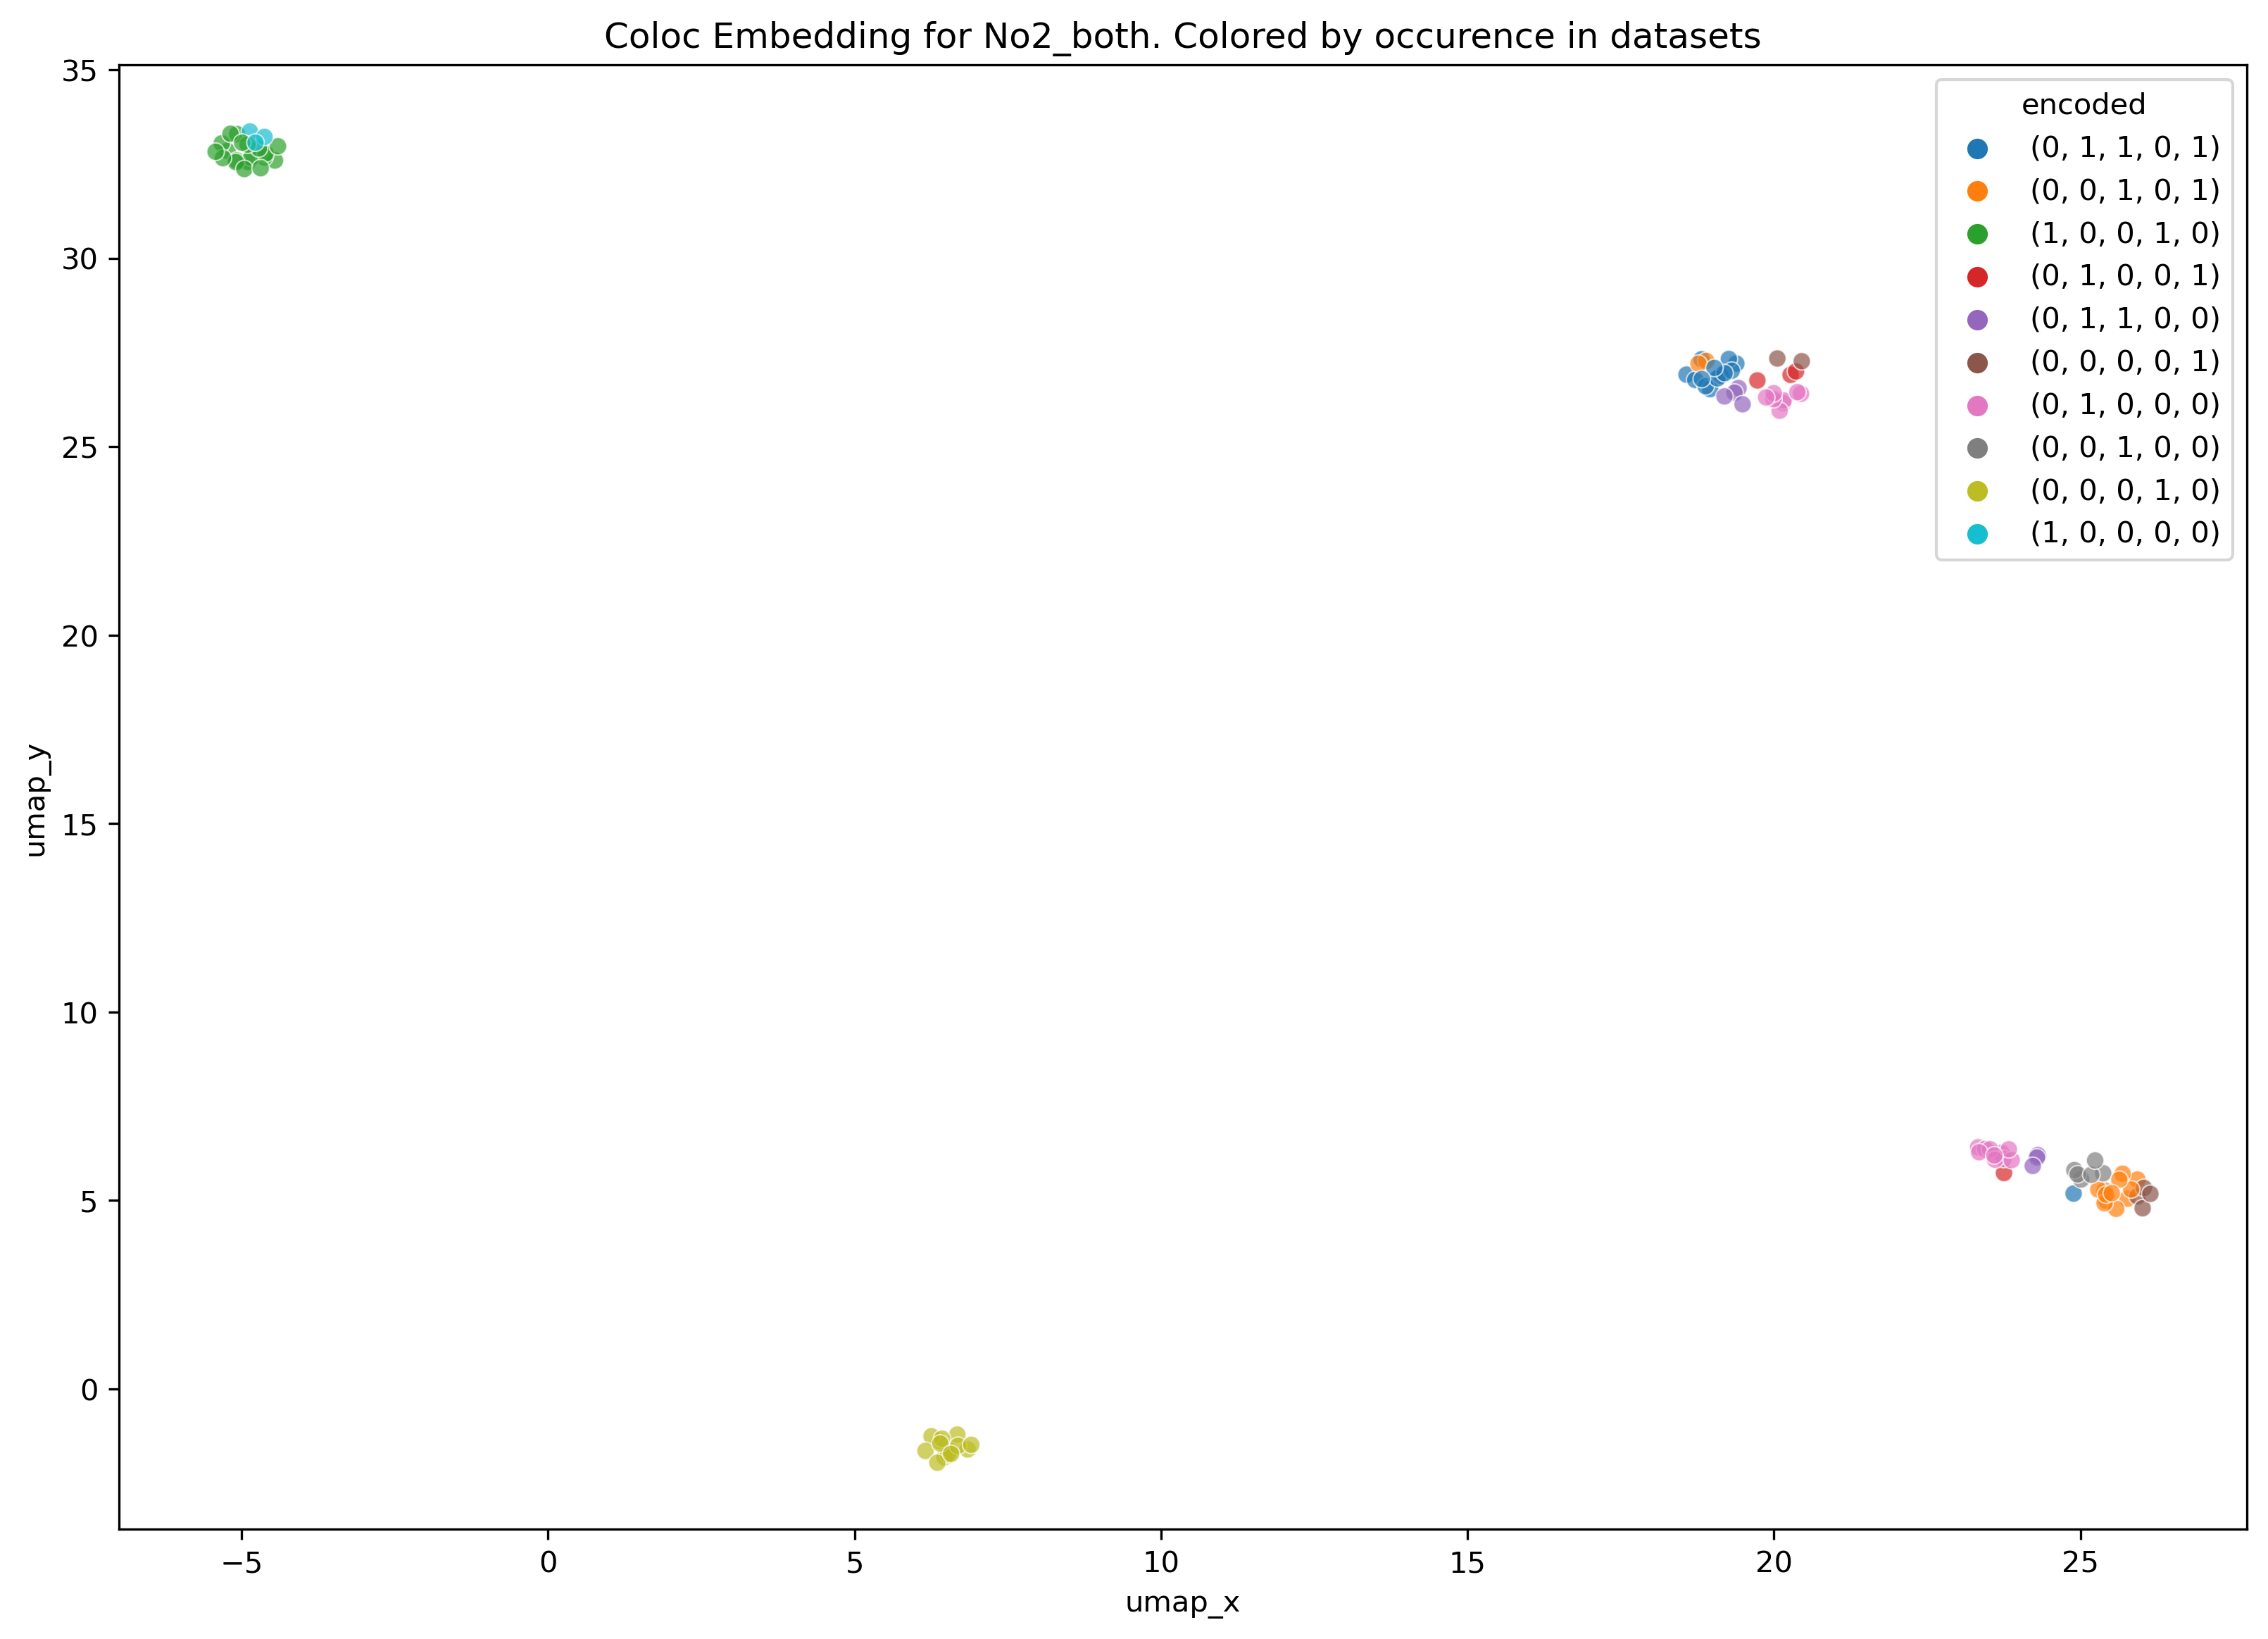

In [49]:
ax = sns.scatterplot(data = coloc_df, x = 'umap_x', y= 'umap_y', hue='encoded', alpha=0.7)
ax.set_title('Coloc Embedding for No2_both. Colored by occurence in datasets')

plt.show()

In [ ]:
binary_sh = pd.concat([sh_df,pd.get_dummies(sh_df['ds_names'].apply(pd.Series).stack()).sum(level=0)], axis=1)
binary_nosh = pd.concat([nosh_df,pd.get_dummies(nosh_df['ds_names'].apply(pd.Series).stack()).sum(level=0)], axis=1)

In [ ]:
pal = sns.color_palette()
color_dict_single = {'whole body xenograft (1) [RMS norm]': pal[0], 'wb xenograft trp pathway dosed- rms_corrected': pal[1], 
                   'whole body xenograft (2) [RMS norm]': pal[2], 'Servier_Ctrl_mouse_wb_lateral_plane_9aa': pal[3], 
                   'Servier_Ctrl_mouse_wb_median_plane_9aa': pal[4],  'Servier_Ctrl_mouse_wb_median_plane_chca' : pal[5],
                   'Servier_Ctrl_mouse_wb_lateral_plane_chca': pal[6], 'Servier_Ctrl_mouse_wb_lateral_plane_DHB': pal[9]}

color_dict_multiple = {'Multiple Datasets':'gray'}

binary_dict = {0:'lightgray', 1:pal[9]}

In [ ]:
single_sh = sh_df[sh_df['single_dataset_name'] != 'Multiple Datasets']
multiple_sh = sh_df[sh_df['single_dataset_name'] == 'Multiple Datasets'] 

single_nosh = nosh_df[nosh_df['single_dataset_name'] != 'Multiple Datasets']
multiple_nosh = nosh_df[nosh_df['single_dataset_name'] == 'Multiple Datasets'] 

In [ ]:
ax = sns.scatterplot(data = single_nosh, x = 'umap_x', y= 'umap_y', hue = 'single_dataset_name', palette = color_dict_single)
sns.scatterplot(data=multiple_nosh, x = 'umap_x', y = 'umap_y', hue='single_dataset_name', palette = color_dict_multiple)

In [ ]:
ax = sns.scatterplot(data = single_sh, x = 'umap_x', y= 'umap_y', hue = 'single_dataset_name', palette = color_dict_single)
sns.scatterplot(data=multiple_sh, x = 'umap_x', y = 'umap_y', hue='single_dataset_name', palette = color_dict_multiple)

In [ ]:
ax = sns.scatterplot(data = binary_nosh, x = 'umap_x', y= 'umap_y', hue = 'Servier_Ctrl_mouse_wb_lateral_plane_DHB', palette = binary_dict)


In [ ]:
ax = sns.scatterplot(data = binary_sh, x = 'umap_x', y= 'umap_y', hue = 'Servier_Ctrl_mouse_wb_lateral_plane_DHB', palette = binary_dict)


In [ ]:
plt.title('GenVa 100: UMAP embeddings colored by occurence in Servier_Ctrl_mouse_wb_lateral_plane_DHB')
#ax = sns.scatterplot(data = all_df, x = 'umap_x', y = 'umap_y', hue = all_df[one_hot.classes_].apply(tuple, axis=1),
#                     palette=palette,  s = 40, )
ax = sns.scatterplot(data = binary_df, x = 'umap_x', y= 'umap_y', hue = 'Servier_Ctrl_mouse_wb_lateral_plane_DHB', palette = binary_dict)
#sns.scatterplot(data = multiple_ds_df, x = 'umap_x', y='umap_y', hue = 'single_dataset_name', palette = color_dict_multiple, alpha = 0.3)
#label_point(all_df.umap_x, all_df.umap_y, all_df.mol_name, plt.gca())
plt.xlabel('UMAP dimension 1')
plt.ylabel('UMAP dimension 2')


#left, bottom, width, height = (10.5, 10.6, 2.4, 2.6)
#rect=mpatches.Rectangle((left,bottom),width,height, fill=False,color="purple",linewidth=2)
#plt.gca().add_patch(rect)
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
#plt.savefig('plots/GenVa100_AllData_datasets_lateral_DHB.png', format='png')

In [ ]:
plt.title('GenVa 100: UMAP embeddings colored by superclass')

ax = sns.scatterplot(data = all_df, x = 'umap_x', y= 'umap_y', hue = 'super_class')
#label_point(all_df.umap_x, all_df.umap_y, all_df.mol_name, plt.gca())
plt.xlabel('UMAP dimension 1')
plt.ylabel('UMAP dimension 2')

#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
#plt.savefig('plots/GenVa100_AllData_superclass.png', format='png')

Closer look at cluster 1.

In [ ]:
left, bottom, width, height = (5.5, 5.85, 3.5, 2.5)

plt.title('GenVa100: Cluster 1')

ax = sns.scatterplot(data = single_ds_df, x = 'umap_x', y= 'umap_y', hue = 'single_dataset_name', palette = color_dict_single)
sns.scatterplot(data = multiple_ds_df, x = 'umap_x', y='umap_y', hue = 'single_dataset_name', palette = color_dict_multiple, alpha = 0.3)
#label_point(all_df.umap_x, all_df.umap_y, all_df.mol_name, plt.gca())
plt.xlabel('UMAP dimension 1')
plt.ylabel('UMAP dimension 2')

rect=mpatches.Rectangle((left,bottom),width,height, 
                        fill=False,
                        color="darkblue",
                       linewidth=2)

plt.gca().add_patch(rect)
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
#plt.savefig('plots/GenVa100_AllData_Cluster1.png', format='png')

In [ ]:
c1,_ = ion_cluster(all_df, left, left+width, bottom, bottom+height, 'super_class', 'mol_name',
                title = 'GenVa100: Cluster 1, superclass and molecule names', output=None, 
                text_size=6, marker_size=60)

c1,_ = ion_cluster(all_df, left, left+width, bottom, bottom+height, 'single_dataset_name', 'mol_name',
                title = 'GenVa100: Cluster 1, dataset and molecule names', output=None, 
                text_size=6, marker_size=60)

In [ ]:
imshow_ions(c1, out = 'GenVa100_cluster1_ionimgs')

Cluster 2

In [ ]:
c2_bb = [9.8, 1.8, 2.5, 2.6] # left,bottom, width,heigth
left, bottom, width, height = (c2_bb[0], c2_bb[1], c2_bb[2], c2_bb[3])

plt.title('GenVa100: Cluster 2')

ax = sns.scatterplot(data = single_ds_df, x = 'umap_x', y= 'umap_y', hue = 'single_dataset_name', palette = color_dict_single)
sns.scatterplot(data = multiple_ds_df, x = 'umap_x', y='umap_y', hue = 'single_dataset_name', palette = color_dict_multiple, alpha = 0.3)
plt.xlabel('UMAP dimension 1')
plt.ylabel('UMAP dimension 2')

rect=mpatches.Rectangle((left,bottom),width,height, 
                        fill=False,
                        color="orange",
                       linewidth=2)

plt.gca().add_patch(rect)
plt.tight_layout()
#plt.savefig('plots/GenVa100_AllData_Cluster2.png', format='png')

In [ ]:
c2,_ = ion_cluster(all_df,c2_bb[0], c2_bb[0]+c2_bb[2], c2_bb[1], c2_bb[1]+c2_bb[3], 'super_class', 'mol_name',
                title = 'GenVa100: Cluster 2, superclass and molecule names', output=None, 
                text_size=6, marker_size=60)

c2,_ = ion_cluster(all_df, c2_bb[0], c2_bb[0]+c2_bb[2], c2_bb[1], c2_bb[1]+c2_bb[3], 'single_dataset_name', 'mol_name',
                title = 'GenVa100: Cluster 2, dataset and molecule names', output=None, 
                text_size=6, marker_size=60)

In [ ]:
imshow_ions(c2, out = 'GenVa100_cluster2_ionimgs')

In [ ]:
c3_bb = [-7, 1.9, 3.7, 2.3] # left,bottom, width,heigth

plt.title('GenVa100: Cluster 3')

ax = sns.scatterplot(data = single_ds_df, x = 'umap_x', y= 'umap_y', hue = 'single_dataset_name', palette = color_dict_single)
sns.scatterplot(data = multiple_ds_df, x = 'umap_x', y='umap_y', hue = 'single_dataset_name', palette = color_dict_multiple, alpha = 0.3)
plt.xlabel('UMAP dimension 1')
plt.ylabel('UMAP dimension 2')

rect=mpatches.Rectangle((c3_bb[0],c3_bb[1]),c3_bb[2],c3_bb[3], 
                        fill=False,
                        color="grey",
                       linewidth=2)

plt.gca().add_patch(rect)
plt.tight_layout()
#plt.savefig('plots/GenVa100_AllData_Cluster3.png', format='png')

In [ ]:
c3,_ = ion_cluster(all_df,c3_bb[0], c3_bb[0]+c3_bb[2], c3_bb[1], c3_bb[1]+c3_bb[3], 'super_class', 'mol_name',
                title = 'GenVa100: Cluster 3, superclass and molecule names', output=None, 
                text_size=5, marker_size=60)

c3,_ = ion_cluster(all_df, c3_bb[0], c3_bb[0]+c3_bb[2], c3_bb[1], c3_bb[1]+c3_bb[3], 'single_dataset_name', 'mol_name',
                title = 'GenVa100: Cluster 3, dataset and molecule names', output=None, 
                text_size=5, marker_size=60)

In [ ]:
imshow_ions(c3, out = 'GenVa100_cluster3_ionimgs')

In [ ]:
c4_bb = [0.3, 4.45, 1.6, 1.3] # left,bottom, width,heigth

plt.title('GenVa100: Cluster 4')

ax = sns.scatterplot(data = single_ds_df, x = 'umap_x', y= 'umap_y', hue = 'single_dataset_name', palette = color_dict_single)
sns.scatterplot(data = multiple_ds_df, x = 'umap_x', y='umap_y', hue = 'single_dataset_name', palette = color_dict_multiple, alpha = 0.3)
plt.xlabel('UMAP dimension 1')
plt.ylabel('UMAP dimension 2')

rect=mpatches.Rectangle((c4_bb[0],c4_bb[1]),c4_bb[2],c4_bb[3], 
                        fill=False,
                        color="darkgreen",
                       linewidth=2)

plt.gca().add_patch(rect)
plt.tight_layout()
#plt.savefig('plots/GenVa100_AllData_Cluster4.png', format='png')

In [ ]:
c4,_ = ion_cluster(all_df,c4_bb[0], c4_bb[0]+c4_bb[2], c4_bb[1], c4_bb[1]+c4_bb[3], 'super_class', 'mol_name',
                title = 'GenVa100: Cluster 4, superclass and molecule names', output=None, 
                text_size=8, marker_size=80)

c4,_ = ion_cluster(all_df, c4_bb[0], c4_bb[0]+c4_bb[2], c4_bb[1], c4_bb[1]+c4_bb[3], 'single_dataset_name', 'mol_name',
                title = 'GenVa100: Cluster 4, dataset and molecule names', output=None, 
                text_size=8, marker_size=80)

In [ ]:
imshow_ions(c4, out = 'GenVa100_cluster4_ionimgs')

In [ ]:
# Compare to No2_both (positive and negative mode)
No2both_vecs = "slurm_job/ThNo2_both_gensim_q00p50_10iters_sg.model.txt"

In [ ]:
two_df = get_meta_df(No2both_vecs, txt=True, embed=True)

In [ ]:
binary_df = pd.concat([two_df,pd.get_dummies(two_df['ds_names'].apply(pd.Series).stack()).sum(level=0)], axis=1)

In [ ]:
binary_df

In [ ]:
single_ds_df2 = two_df[two_df['single_dataset_name'] != 'Multiple Datasets']
multiple_ds_df2 = two_df[two_df['single_dataset_name'] == 'Multiple Datasets'] 

In [ ]:
plt.title('GenVa: UMAP embeddings colored by occurence in datasets')
#ax = sns.scatterplot(data = all_df, x = 'umap_x', y = 'umap_y', hue = all_df[one_hot.classes_].apply(tuple, axis=1),
#                     palette=palette,  s = 40, )
ax = sns.scatterplot(data = single_ds_df2, x = 'umap_x', y= 'umap_y', hue = 'single_dataset_name', palette = color_dict_single)
sns.scatterplot(data = multiple_ds_df2, x = 'umap_x', y='umap_y', hue = 'single_dataset_name', palette = color_dict_multiple, alpha = 0.3)
#label_point(all_df.umap_x, all_df.umap_y, all_df.mol_name, plt.gca())


#left, bottom, width, height = (10.5, 10.6, 2.4, 2.6)
#rect=mpatches.Rectangle((left,bottom),width,height, fill=False,color="purple",linewidth=2)
#plt.gca().add_patch(rect)
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig('plots/GenVa_No2both_datasets.png', format='png')